In [1]:
# Import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [2]:
# Get data

hs = pd.read_csv("/Users/joerussell/Desktop/DATASCIENCE/PROJECTS/ESPNrecruits/recruiting_classes.csv")
nba = pd.read_csv("/Users/joerussell/Desktop/DATASCIENCE/PROJECTS/ESPNrecruits/nba_recruits.csv")

## Prospects in High School

In [3]:
# Clean / Prepare Data

hs.drop(hs[hs.Class > 2017].index, inplace=True)
hs.drop(['Unnamed: 0'], axis=1, inplace=True)
hs.describe()

,Rank,Grade,Height_Inches,Weight,Class
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,49.766758,91.335170,77.923783,201.283747,2012.000000
std,28.443875,4.942004,3.265049,25.950344,3.163731
min,1.000000,80.000000,66.000000,150.000000,2007.000000
25%,25.000000,87.000000,76.000000,180.000000,2009.000000
50%,50.000000,93.000000,78.000000,200.000000,2012.000000
75%,74.000000,96.000000,80.000000,215.000000,2015.000000
max,100.000000,99.000000,89.000000,330.000000,2017.000000


In [4]:
hs.isnull().sum()

Rank             0
Name             0
Position         0
Town             0
State            0
Grade            0
School           1
Height           0
Height_Inches    0
Weight           0
College          0
Link             0
Class            0
dtype: int64

In [5]:
# Replace missing weights with mean weight by height

for index in hs.index[hs.Weight.isnull()]:
    hs.Weight[index] = \
        hs.Weight[hs.Height == hs.Height[index]].mean()


hs[['Name', 'State', 'Town']][hs.School.isnull()]
hs.loc[hs.Name == 'Emmanuel Akot', 'School'] = 'Wasatch Academy'
nba.loc[nba.Name == 'Emmanuel Akot', 'School'] = 'Wasatch Academy'

### Analysis

Where do high school prospects come from?

Text(0.5, 1.0, 'Prospects by School')

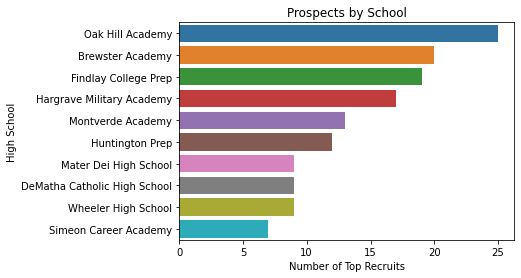

In [6]:
# Top High Schools

topschools = hs.groupby("School").School.count().sort_values(ascending=False).head(10)
sns.barplot(x=topschools, y=topschools.index)
plt.xlabel("Number of Top Recruits")
plt.ylabel("High School")
plt.title("Prospects by School")

In [7]:
# Top Prospect-Producing US States

us_states = ['CA', 'TX', 'GA', 'FL', 'IL', 'NY', 'NC', 'MD', 'IN', 'OH', 'PA', \
             'VA', 'NJ', 'MI', 'TN', 'WA', 'WI', 'AL', 'MA', 'AZ', 'MN', 'SC', \
             'NV', 'MO', 'MS', 'LA', 'AR', 'KS', 'OR', 'KY', 'CT', 'DC', 'IA', \
             'UT', 'OK', 'NH', 'RI', 'WV', 'CO', 'NE', 'DE', 'NM', 'AK', 'WY', \
             'MT', 'ME', 'ND', 'SD', 'VT', 'ID', 'HI']

us_recruits = hs[hs.State.isin(us_states)]
state_recruits = us_recruits.groupby("State").State.count().sort_values(ascending=False)

# Create Map

usa = folium.Map(location=[40, -95], zoom_start=4)

url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data"
)
state_geo = f"{url}/us-states.json"

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=state_recruits,
    columns=["State"],
    key_on="feature.id",
    fill_color="YlOrRd",
    legend_name="Recruits by State",
).add_to(usa)

usa

Apart from California and Texas, the two most populous states in the country, the East Coast and the South are dominant in generating top prospects.

Text(0.5, 1.0, 'Recruits by College')

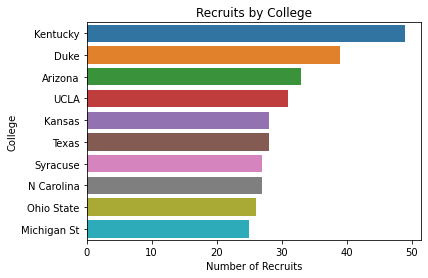

In [8]:
# Top Colleges

topcolleges = hs.groupby("College").College.count().sort_values(ascending=False).head(10)
sns.barplot(x=topcolleges, y=topcolleges.index)
plt.xlabel("Number of Recruits")
plt.title("Recruits by College")

In [9]:
# Best Recruiting Classes by Grade (grading system changed in 2013)

top_college_list = hs.College.value_counts().head(10).index
pop_colleges = hs[hs.College.isin(top_college_list)]

early = pop_colleges[(hs.Class < 2013)]
recent = pop_colleges[(hs.Class >= 2013)]

college_grades_pre2013 = early.groupby("College").Grade.mean().sort_values(ascending=False)
college_grades_pre2013

<ipython-input-9-8536b54d8981>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  early = pop_colleges[(hs.Class < 2013)]
<ipython-input-9-8536b54d8981>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  recent = pop_colleges[(hs.Class >= 2013)]


College
Duke          96.470588
Kentucky      96.130435
Florida       95.785714
Syracuse      95.733333
N Carolina    95.705882
UCLA          95.647059
Ohio State    95.533333
Texas         95.333333
Kansas        94.769231
Arizona       94.687500
Name: Grade, dtype: float64

In [10]:
college_grades_post2013 = recent.groupby("College").Grade.mean().sort_values(ascending=False)
college_grades_post2013

College
Duke          93.090909
Kentucky      93.000000
Kansas        91.533333
N Carolina    90.100000
UCLA          89.071429
Arizona       88.941176
Texas         87.615385
Florida       87.272727
Ohio State    87.000000
Syracuse      86.083333
Name: Grade, dtype: float64

Text(0.5, 1.0, 'Ranks of Prospects for Top Colleges')

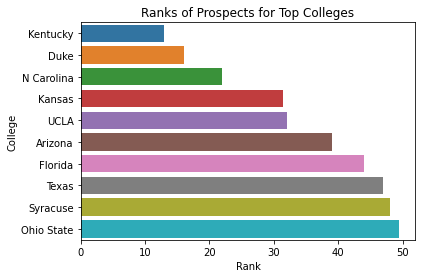

In [11]:
# Best Recruiting Classes by Rank

college_ranks = pop_colleges.groupby("College").Rank.median().sort_values(ascending=True)
sns.barplot(x=college_ranks, y=college_ranks.index)
plt.title("Ranks of Prospects for Top Colleges")

Since 2007, no universities have been as dominant in attracting high school as Duke and Kentucky.

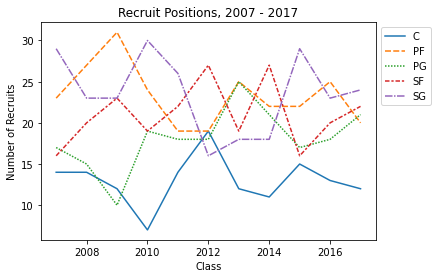

In [12]:
# Changes in Position by Class

class_pos = hs.groupby(["Class"])['Position'].value_counts().unstack()
sns.lineplot(data=class_pos)
plt.title("Recruit Positions, 2007 - 2017")
plt.xlabel("Class")
plt.ylabel("Number of Recruits")
plt.legend(bbox_to_anchor=(1,1))

Centers are consistently underrepresented in recruiting classes, and point guards have been fairly overlooked as well.

## NBA Data

In [13]:
nba.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)
nba.describe()

,Rank,Grade,Height_Inches,Weight,Class,MIN,GP,PTS,REB,AST,STL,BLK,TOV,FGM,FGA,FG3M,FG3A
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,49.766758,91.335170,77.923783,201.283747,2012.000000,2003.243343,85.093664,901.341598,362.595041,195.862259,65.145087,40.531680,120.591368,338.103765,739.232323,73.239669,208.359045
std,28.443875,4.942004,3.265049,25.950344,3.163731,5061.861957,188.849454,2506.890248,1046.040169,625.130136,173.834573,137.276005,344.808740,930.002055,2015.993469,223.844050,616.854310
min,1.000000,80.000000,66.000000,150.000000,2007.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,87.000000,76.000000,180.000000,2009.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,50.000000,93.000000,78.000000,200.000000,2012.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,74.000000,96.000000,80.000000,215.000000,2015.000000,435.000000,39.000000,118.000000,65.000000,24.000000,12.000000,6.000000,21.000000,50.000000,121.000000,3.000000,15.000000
max,100.000000,99.000000,89.000000,330.000000,2017.000000,38279.000000,1254.000000,23128.000000,10780.000000,7036.000000,1420.000000,1876.000000,3432.000000,7777.000000,15830.000000,2566.000000,7062.000000


In [14]:
nba['FG_PCT'] = nba['FGM'] / nba['FGA']
nba['FG3_PCT'] = nba['FG3M'] / nba['FG3A']

# Game Score - Player Productivity Metric

nba['GAME_SCORE'] = (nba['PTS'] + (0.4 * nba['FGM']) -(0.7 * nba['FGA']) + nba['REB'] + \
        nba['STL'] + (0.7 * nba['AST']) + (0.7 * nba['BLK']) - nba['TOV']) / nba['GP']

nba.fillna(0, inplace=True)
played_nba = nba[nba.MIN > 0]
played_college = nba[nba.MIN == 0]

### Analysis

Text(0.5, 1.0, 'NBA Player Productivity by College')

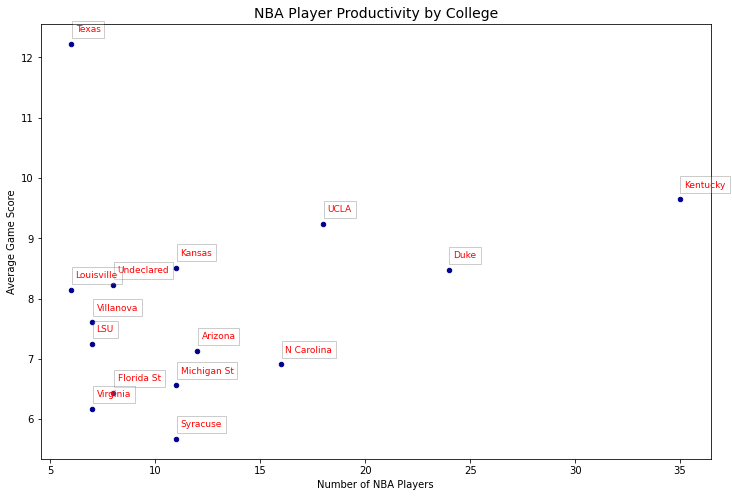

In [15]:
# Top Colleges for NBA Production
top_nba_colleges = played_nba.College.value_counts().head(15).index
pop_college_nba = played_nba[played_nba.College.isin(top_nba_colleges)]

count_by_college = pop_college_nba.College.value_counts().sort_values(ascending=False)
gs_by_college = pop_college_nba.groupby("College").GAME_SCORE.mean().sort_values(ascending=False)

col_in_nba = pd.concat([count_by_college, gs_by_college], axis=1)
col_in_nba.plot(kind='scatter', x='College', y='GAME_SCORE', figsize=(12, 8), color='darkblue')
for i in range(15):
    plt.text(x=col_in_nba.College[i]+0.2, y=col_in_nba.GAME_SCORE[i]+0.2, s=col_in_nba.index[i],
            fontdict=dict(color='red', size=9),
            bbox=dict(facecolor='white', alpha=0.2))
plt.xlabel("Number of NBA Players")
plt.ylabel("Average Game Score")
plt.title("NBA Player Productivity by College", fontsize=14)

Duke's recruiting classes are consistently ranked higher than Kentucky's, but Kentucky produces more NBA prospects, who are more effective in the league.

Text(0.5, 1.0, 'NBA Players Produced by College')

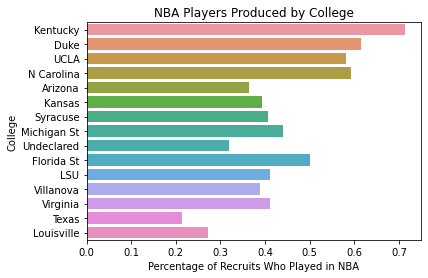

In [16]:
pct_nba = []
for college in top_nba_colleges:
    made_nba = played_nba[played_nba.College == college].Name.count() / nba[nba.College == college].Name.count()
    pct_nba.append(made_nba)

sns.barplot(x=pct_nba, y=top_nba_colleges)
plt.xlabel("Percentage of Recruits Who Played in NBA")
plt.ylabel("College")
plt.title("NBA Players Produced by College")

In [17]:
# Size in High School vs. NBA Players

nba_height = played_nba.Height_Inches
nba_weight = played_nba.Weight
hs_height = played_college.Height_Inches
hs_weight = played_college.Weight

print("Average NBA recruit height and weight: ", nba_height.mean(), "inches,", nba_weight.mean(), "pounds")
print("Average HS recruit height and weight: ", hs_height.mean(), "inches,", hs_weight.mean(), "pounds")

Average NBA recruit height and weight:  78.21971830985916 inches, 202.456338028169 pounds
Average HS recruit height and weight:  77.78065395095368 inches, 200.716621253406 pounds


Although not a significant difference, the data suggests that taller and heavier recruits are more likely to make it to the NBA, unsurprisingly.

Text(0.5, 1.0, 'Productivity in NBA by Position')

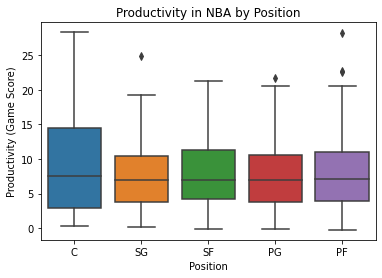

In [18]:
# Productivity by Position

sns.boxplot(x='Position', y='GAME_SCORE', data=played_nba)
plt.ylabel("Productivity (Game Score)")
plt.title("Productivity in NBA by Position")

In [19]:
# ESPN Ranking Accuracy in NBA

print("Correlation between ESPN rank and NBA Production (only NBA players):", \
      -played_nba.Rank.corr(played_nba.GAME_SCORE))
print("Correlation between ESPN rank and NBA Production (all recruits):", \
      -nba.Rank.corr(nba.GAME_SCORE))

Correlation between ESPN rank and NBA Production (only NBA players): 0.2990918861471063
Correlation between ESPN rank and NBA Production (all recruits): 0.41500833547970195


In [20]:
print("Correlation between ESPN grade and NBA Production (only NBA players):", \
      played_nba.Grade.corr(played_nba.GAME_SCORE))
print("Correlation between ESPN grade and NBA Production (all recruits):", \
      nba.Grade.corr(nba.GAME_SCORE))

Correlation between ESPN grade and NBA Production (only NBA players): 0.26045077413223094
Correlation between ESPN grade and NBA Production (all recruits): 0.3038453245074685


In [21]:
print("ESPN Rank Accuracy by Position:")
for pos in ['PG', 'SG', 'SF', 'PF', 'C']:
    print(pos+":", -played_nba[played_nba.Position == pos].Rank.corr(played_nba[played_nba.Position == pos].GAME_SCORE))

ESPN Rank Accuracy by Position:
PG: 0.3264234277878103
SG: 0.16681278549329562
SF: 0.22949147418011734
PF: 0.2653618731714006
C: 0.5541595286502853


Text(0.5, 1.0, 'NBA Player Count by High School Rank')

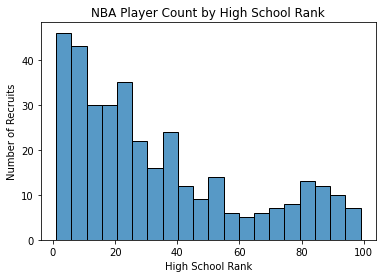

In [22]:
sns.histplot(data=played_nba, x='Rank', bins=20)
plt.xlabel("High School Rank")
plt.ylabel("Number of Recruits")
plt.title("NBA Player Count by High School Rank")

ESPN is somewhat consistent in recognizing top NBA-level talent, but after the top 40 prospects, there is no real correlation between rank and future basketball success.